In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from simulation import *
from source import *
from aux_observation import *

In [2]:
filename = './dl2_gamma-diffuse_testing.h5'

In [3]:
sim = simulation_object(filename)

In [4]:
src = source_object(tobs=60*u.min)

In [5]:
obs = observation(sim, src)

## Spatial Weights

In [6]:
src_disk = source_object(tobs=60*u.min, shape="disk")
src_ring = source_object(tobs=60*u.min, rmin = 0.5)
src_gauss = source_object(tobs=60*u.min, shape="gaussian")

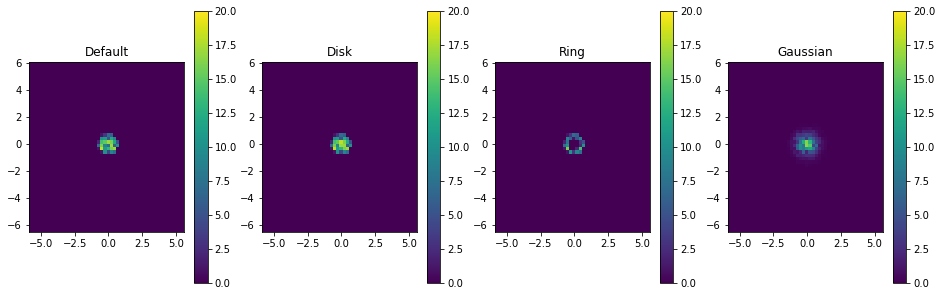

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(141, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Default')
plt.colorbar();

plt.subplot(142, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_disk.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Disk')
plt.colorbar();

plt.subplot(143, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_ring.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Ring')
plt.colorbar();

plt.subplot(144, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_gauss.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Gaussian')
plt.colorbar();

## Final Weight

In [8]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 
        0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 
        25.851032, 40]
src_cutoff = source_object(60*u.min, spectrum_parameters = src.cutoff_spectrum_parameters) 
src_powerlaw = source_object(tobs=60*u.min, spectrum_parameters = src.powerlaw_spectrum_parameters)
obs_disk = observation(sim, src_disk)
obs_ring = observation(sim, src_ring)
obs_gauss = observation(sim, src_gauss)
obs_cutoff = observation(sim, src_cutoff)
obs_powerlaw = observation(sim, src_powerlaw)

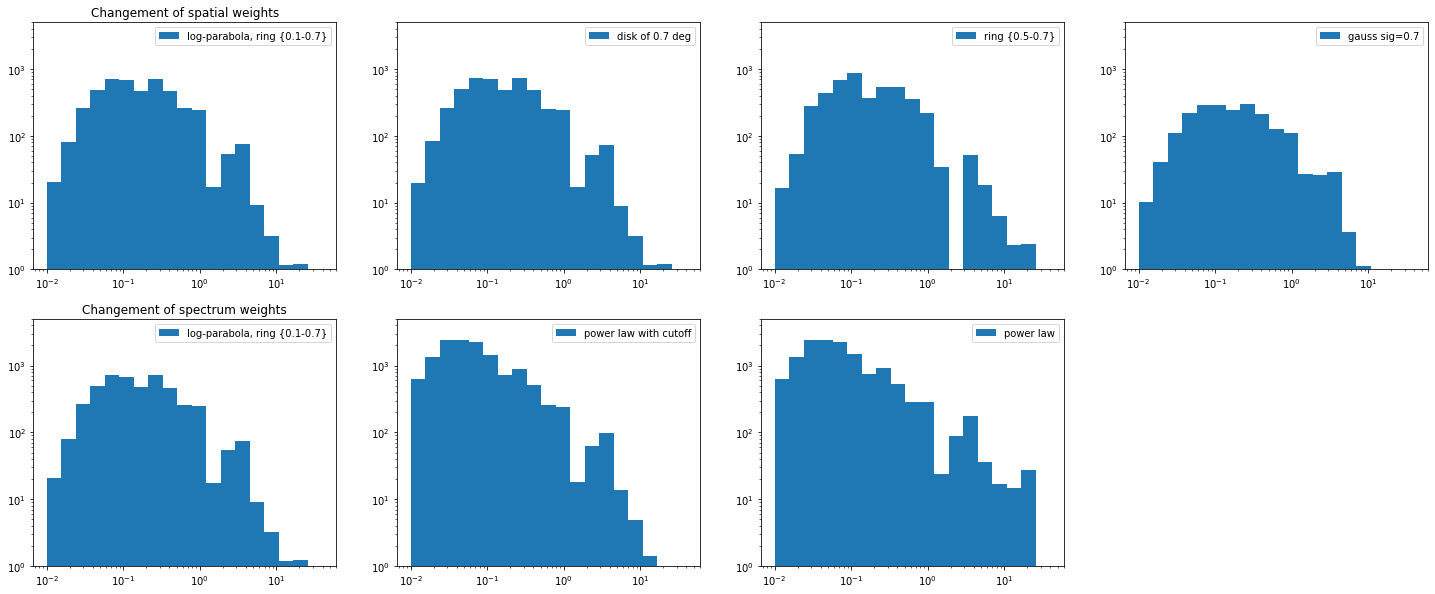

In [9]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs.weighting(),
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_disk.weighting(),
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_ring.weighting(),
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_gauss.weighting(),
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs.weighting(),
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_cutoff.weighting(),
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_powerlaw.weighting(),
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();


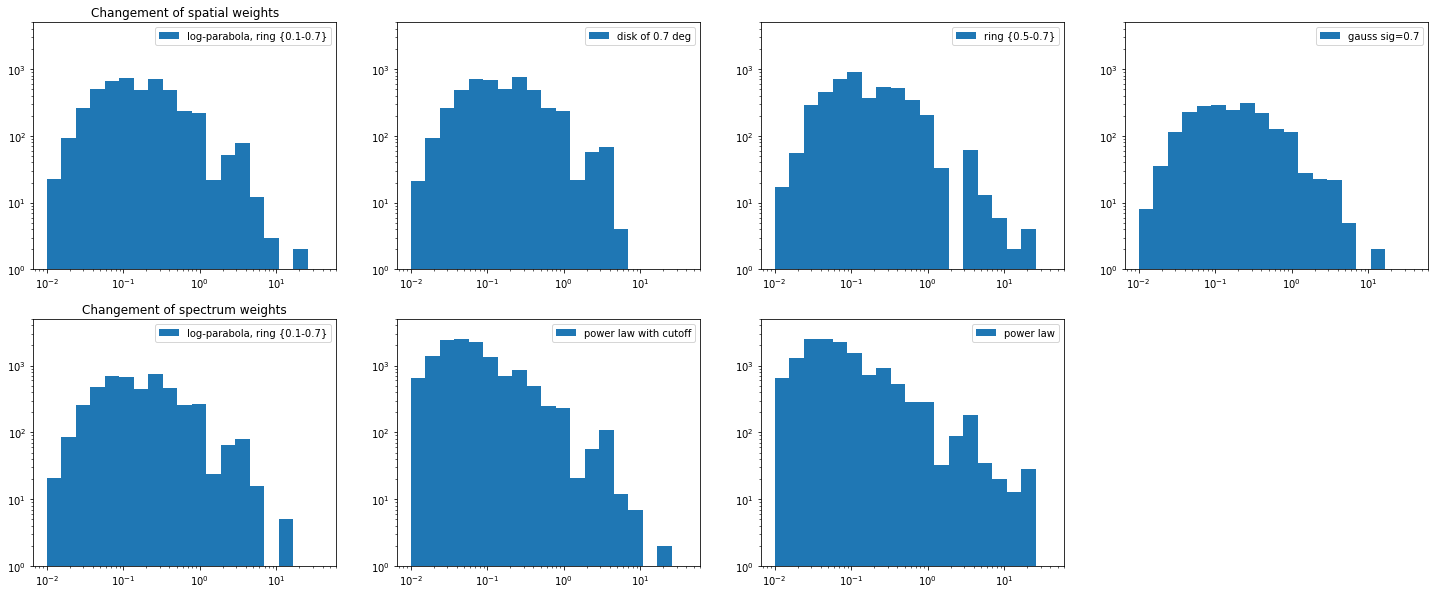

In [11]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_disk.final_sim()['mc_energy'],
    bins= binning,
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_ring.final_sim()['mc_energy'],
    bins= binning,
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_gauss.final_sim()['mc_energy'],
    bins= binning,
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_cutoff.final_sim()['mc_energy'],
    bins= binning,
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_powerlaw.final_sim()['mc_energy'],
    bins= binning,
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();



In [21]:
table = obs.final_sim(write=True)

In [22]:
table

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
4129,1016,3459602,212.101204,2.326543,0.049577,0.143063,0.151409,1.237203,0.140261,0.005205,...,-0.286714,0.137077,3.920087,-0.246193,1.211459,3.155514,0,0.525500,0.000677,59715.041667
2822,1012,1295608,353.423903,2.548296,-0.715426,-0.609292,0.939719,-2.436142,0.214641,0.006081,...,-0.255066,0.005407,11.282534,-0.180875,1.212621,3.142144,0,0.677500,0.000174,59715.041676
1399,1002,2968600,1765.192244,3.246792,0.079189,-0.325934,0.335416,-1.332454,0.256731,0.004359,...,-0.052137,0.012080,-2.514269,0.776554,1.219868,3.142848,0,0.912500,0.000160,59715.041685
353,1001,2147303,292.891673,2.466707,0.210108,0.137783,0.251256,0.580423,0.140256,0.006591,...,0.029616,0.059514,4.699941,1.195754,1.222782,3.147825,101,0.400667,0.000044,59715.041694
3396,1012,4486204,69.492999,1.841941,-0.290107,0.345416,0.451082,2.269385,0.094459,0.004377,...,0.129960,0.136937,-1.375814,0.049812,1.226339,3.156076,101,0.268000,0.000253,59715.041703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,1012,3292002,105.314931,2.022490,0.326266,-0.713883,0.784907,-1.142112,0.164587,0.005152,...,0.238462,-0.223141,6.360670,-0.152084,1.230158,3.117738,0,0.573667,0.000043,59715.083297
257,1001,1628102,195.865392,2.291958,-0.434702,0.738151,0.856640,2.103019,0.136924,0.005790,...,-0.176497,0.263188,8.007119,-0.264981,1.215308,3.168602,0,0.690952,0.000026,59715.083306
448,1001,2705805,73.828026,1.868221,-0.127829,-0.610477,0.623717,-1.777206,0.093331,0.005639,...,-0.155999,-0.242448,-1.020037,0.302511,1.216058,3.116662,101,0.303810,0.000141,59715.083315
1402,1002,2992001,1273.350305,3.104948,0.411839,-0.833495,0.929691,-1.111871,0.268979,0.003819,...,0.174676,-0.271871,6.588390,0.159907,1.227837,3.112716,0,0.826000,0.000196,59715.083324


In [23]:
filename = './simulation.h5'
new = pd.read_hdf(filename, key='dl2/event/telescope/parameters/LST_LSTCam')

In [24]:
new

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
4129,1016,3459602,212.101204,2.326543,0.049577,0.143063,0.151409,1.237203,0.140261,0.005205,...,-0.286714,0.137077,3.920087,-0.246193,1.211459,3.155514,0,0.525500,0.000677,59715.041667
2822,1012,1295608,353.423903,2.548296,-0.715426,-0.609292,0.939719,-2.436142,0.214641,0.006081,...,-0.255066,0.005407,11.282534,-0.180875,1.212621,3.142144,0,0.677500,0.000174,59715.041676
1399,1002,2968600,1765.192244,3.246792,0.079189,-0.325934,0.335416,-1.332454,0.256731,0.004359,...,-0.052137,0.012080,-2.514269,0.776554,1.219868,3.142848,0,0.912500,0.000160,59715.041685
353,1001,2147303,292.891673,2.466707,0.210108,0.137783,0.251256,0.580423,0.140256,0.006591,...,0.029616,0.059514,4.699941,1.195754,1.222782,3.147825,101,0.400667,0.000044,59715.041694
3396,1012,4486204,69.492999,1.841941,-0.290107,0.345416,0.451082,2.269385,0.094459,0.004377,...,0.129960,0.136937,-1.375814,0.049812,1.226339,3.156076,101,0.268000,0.000253,59715.041703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,1012,3292002,105.314931,2.022490,0.326266,-0.713883,0.784907,-1.142112,0.164587,0.005152,...,0.238462,-0.223141,6.360670,-0.152084,1.230158,3.117738,0,0.573667,0.000043,59715.083297
257,1001,1628102,195.865392,2.291958,-0.434702,0.738151,0.856640,2.103019,0.136924,0.005790,...,-0.176497,0.263188,8.007119,-0.264981,1.215308,3.168602,0,0.690952,0.000026,59715.083306
448,1001,2705805,73.828026,1.868221,-0.127829,-0.610477,0.623717,-1.777206,0.093331,0.005639,...,-0.155999,-0.242448,-1.020037,0.302511,1.216058,3.116662,101,0.303810,0.000141,59715.083315
1402,1002,2992001,1273.350305,3.104948,0.411839,-0.833495,0.929691,-1.111871,0.268979,0.003819,...,0.174676,-0.271871,6.588390,0.159907,1.227837,3.112716,0,0.826000,0.000196,59715.083324
